# Credit Risk Analysis

## 1.Importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc_roc

ImportError: cannot import name 'auc_roc' from 'sklearn.metrics' (D:\Innomatics\Lib\site-packages\sklearn\metrics\__init__.py)

## 2.Understand the dataset

In [3]:
data=pd.read_csv('data\dataset.csv')

In [4]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
print(data.shape)

(32581, 12)


In [7]:
data.isna().mean()*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [8]:
data['person_emp_length']=data['person_emp_length'].fillna(data['person_emp_length'].median())

In [9]:
data['loan_int_rate']=data['loan_int_rate'].fillna(data['loan_int_rate'].median())

In [10]:
data.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [11]:
data['person_emp_length']=data['person_emp_length'].apply(lambda x:np.nan if x>=100 else x)

In [12]:
data['person_age']=data['person_age'].apply(lambda x:np.nan if x>=60 else x)

In [13]:
data.dropna(inplace=True)

In [14]:
data.shape

(32494, 12)

In [15]:
data.duplicated().sum()

165

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.duplicated().sum()

0

In [18]:
numerical_cols=data.select_dtypes(include=['int64,','float64'])
categorical_cols=data.select_dtypes(include='object')

In [19]:
Q1=numerical_cols['person_income'].quantile(0.25)
Q3=numerical_cols['person_income'].quantile(0.75)

IQR=Q3-Q1

LW=Q1-1.5*IQR
UW=Q3+1.5*IQR

numerical_cols['person_income']=numerical_cols['person_income'].apply(lambda x:UW if x>=UW else LW if x<LW else x)

<Axes: >

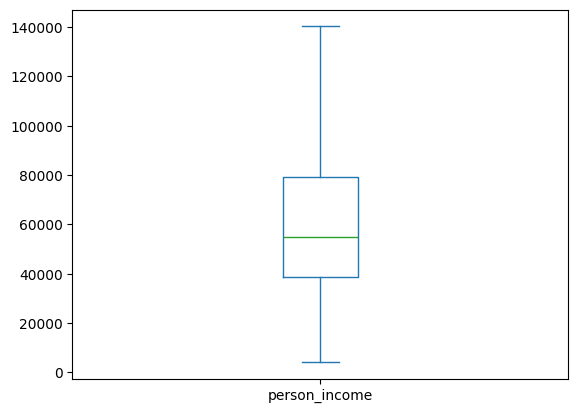

In [20]:
numerical_cols['person_income'].plot(kind='box')

In [21]:
categorical_cols['loan_status']=numerical_cols['loan_status']

numerical_cols.drop(columns=['loan_status'],inplace=True)

## 3.Univariate Analysis

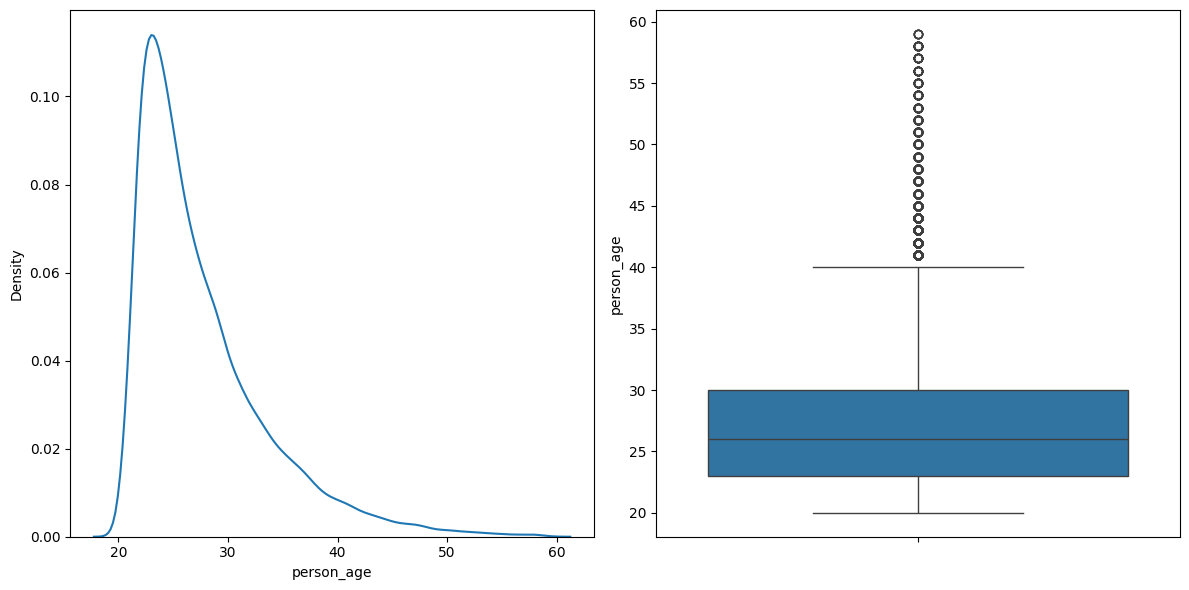

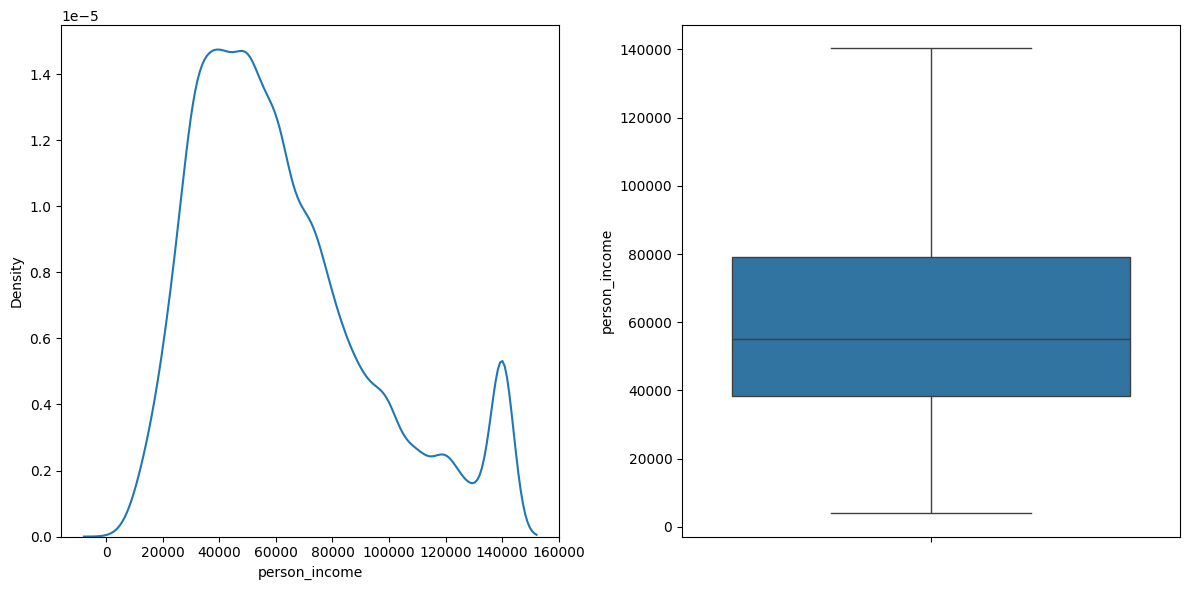

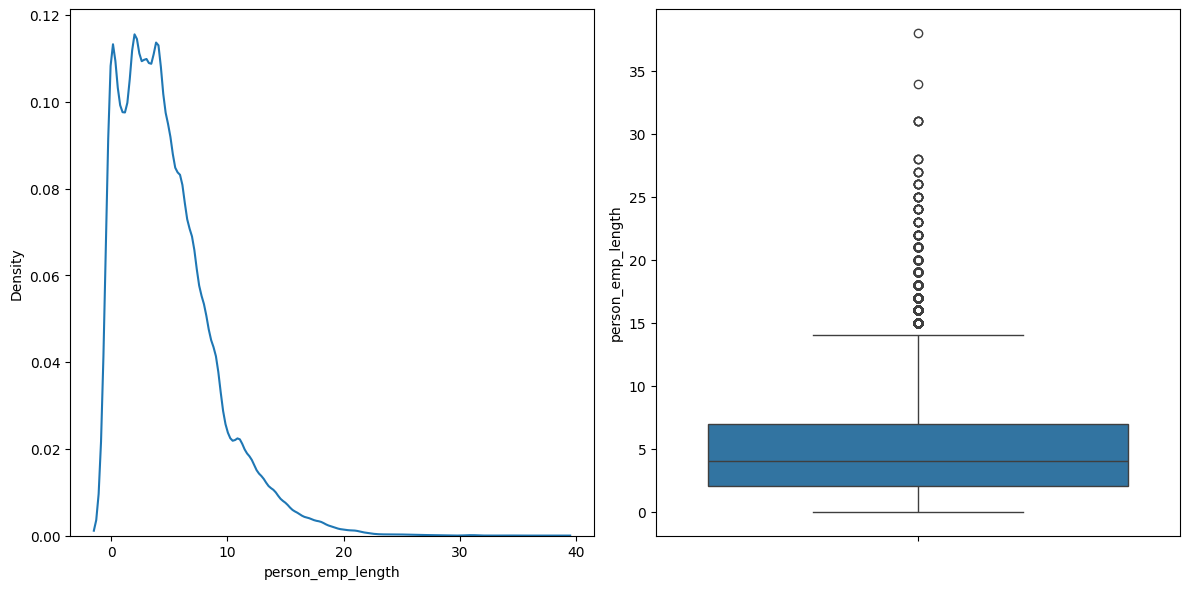

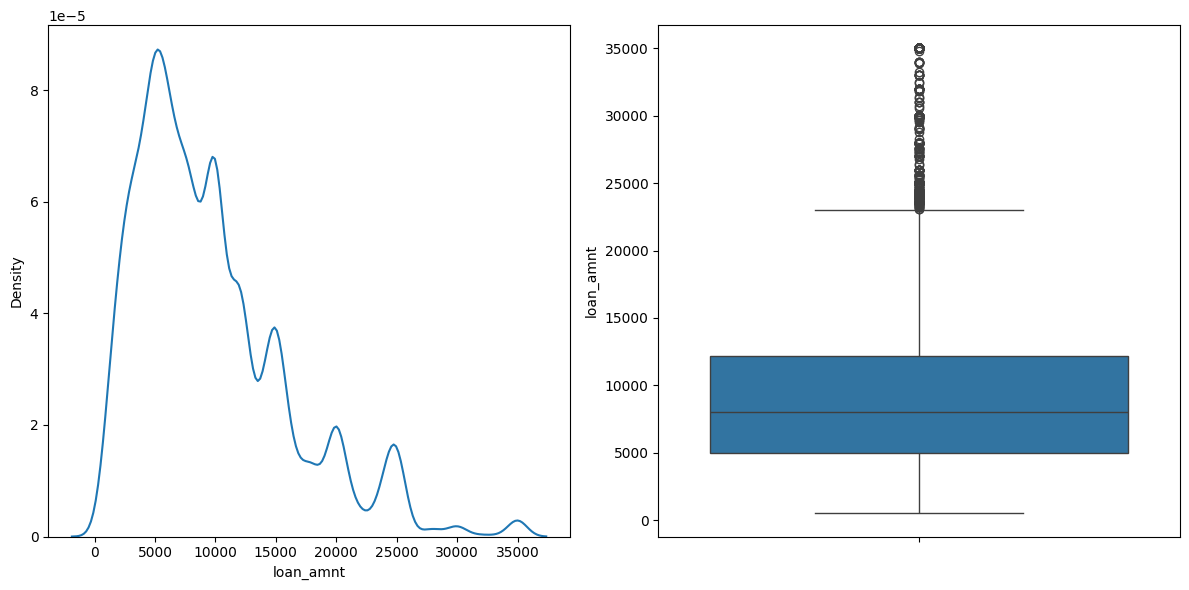

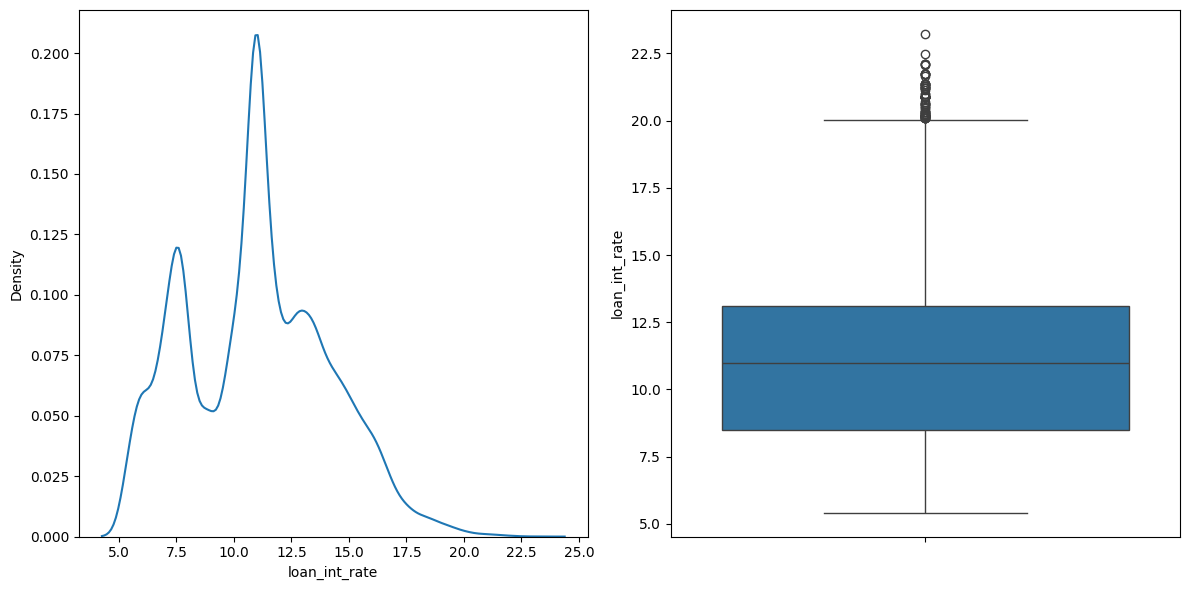

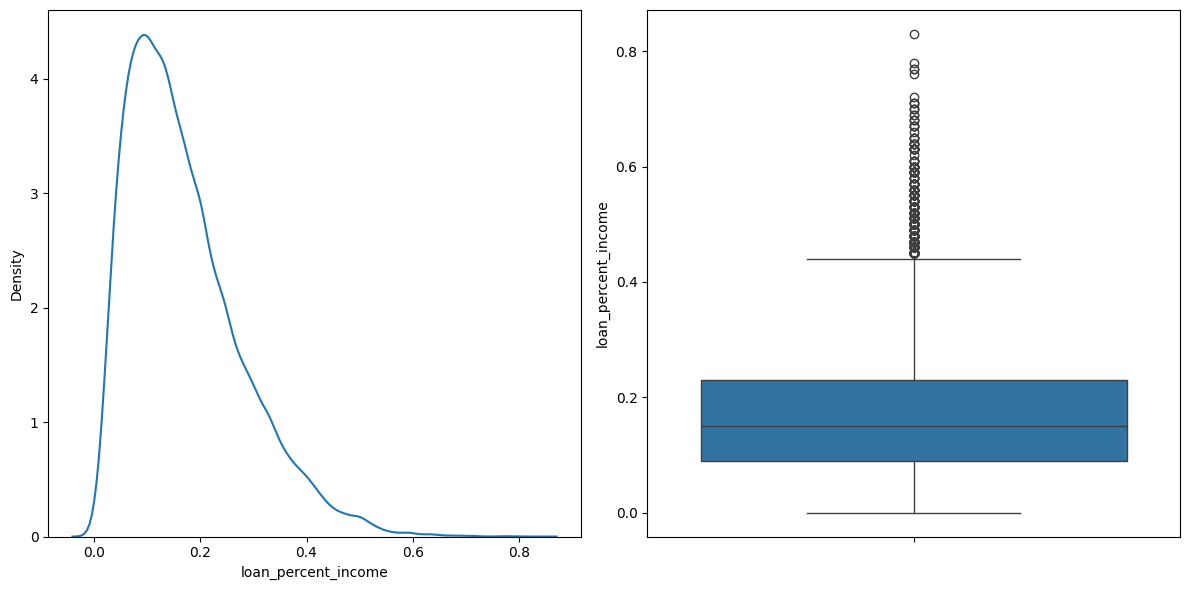

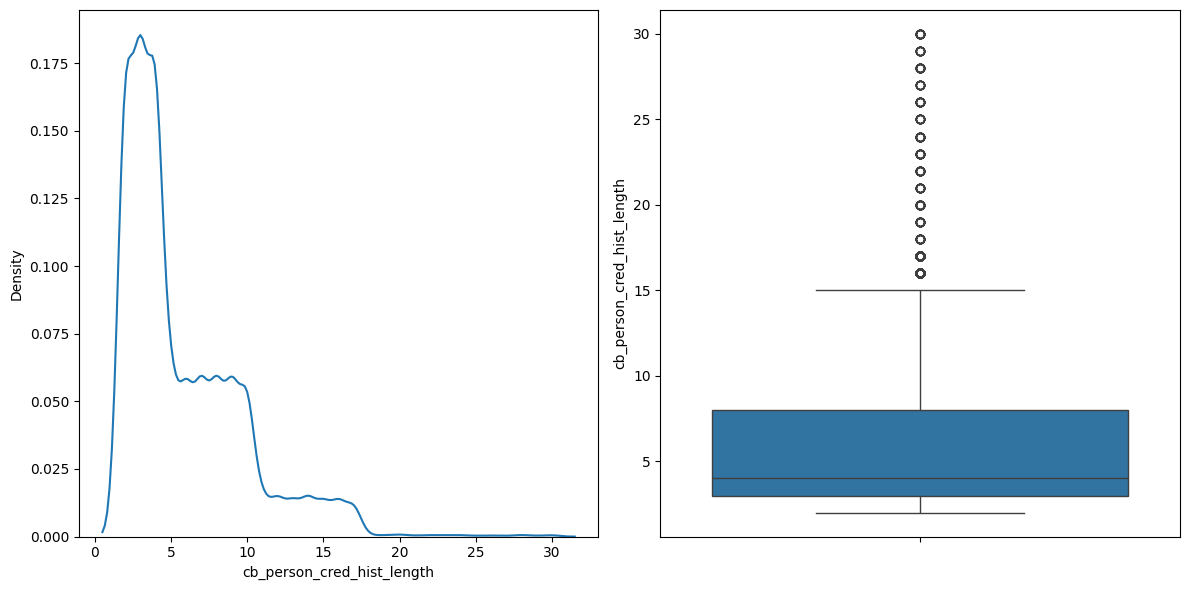

In [22]:
def numeric_analysis(data,col):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.kdeplot(data=data[col])

    plt.subplot(1,2,2)
    sns.boxplot(data=data[col])
    plt.tight_layout()
    plt.show()

for i in numerical_cols.columns:
    numeric_analysis(numerical_cols,i)

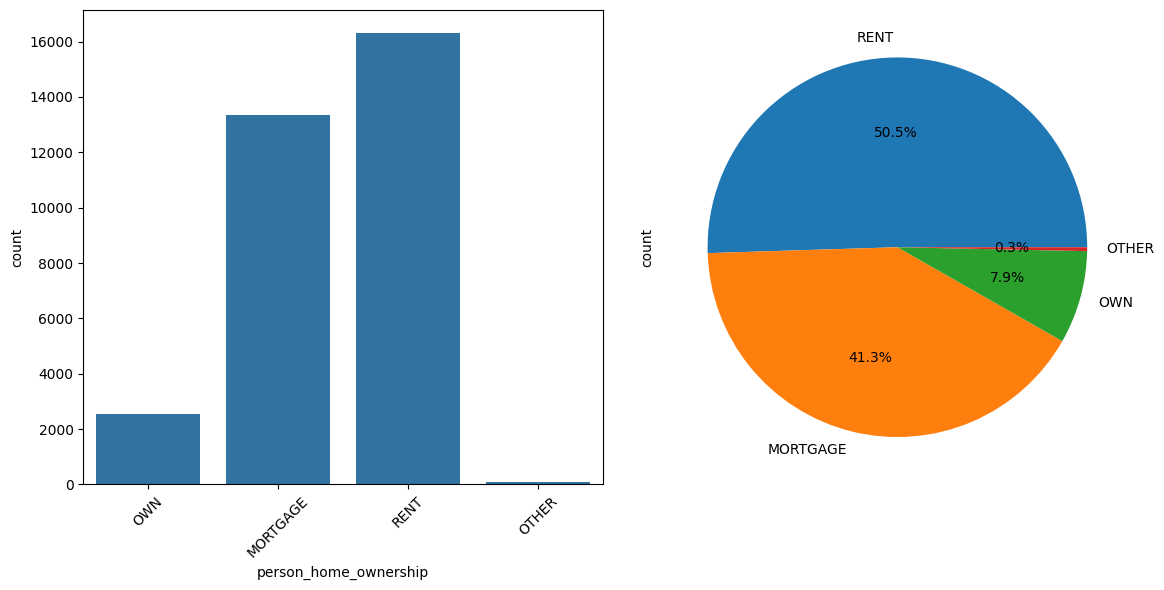

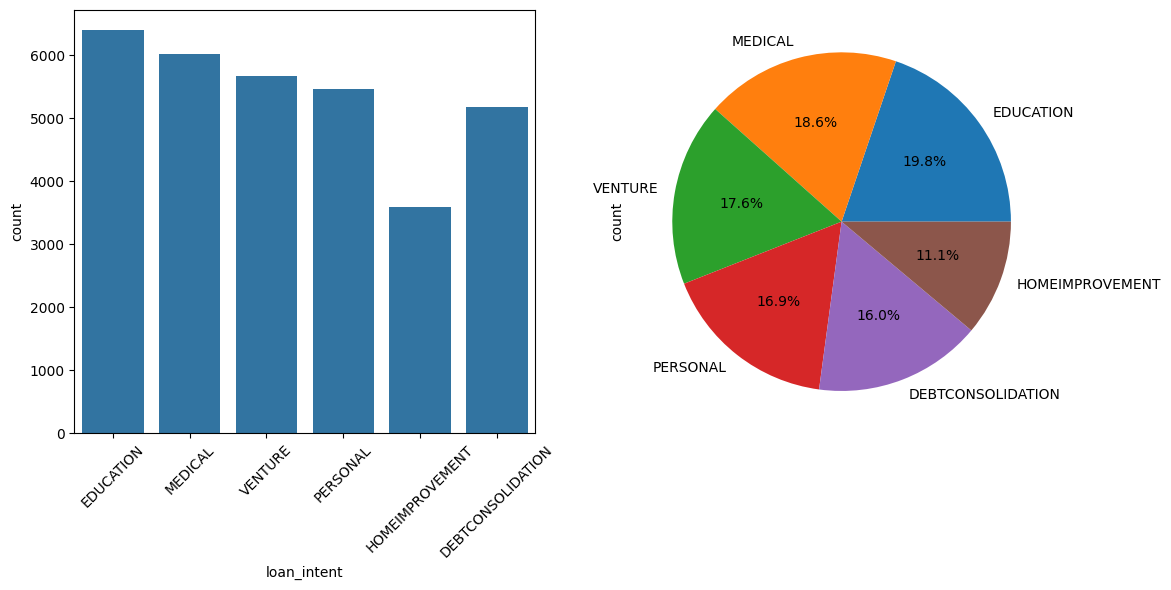

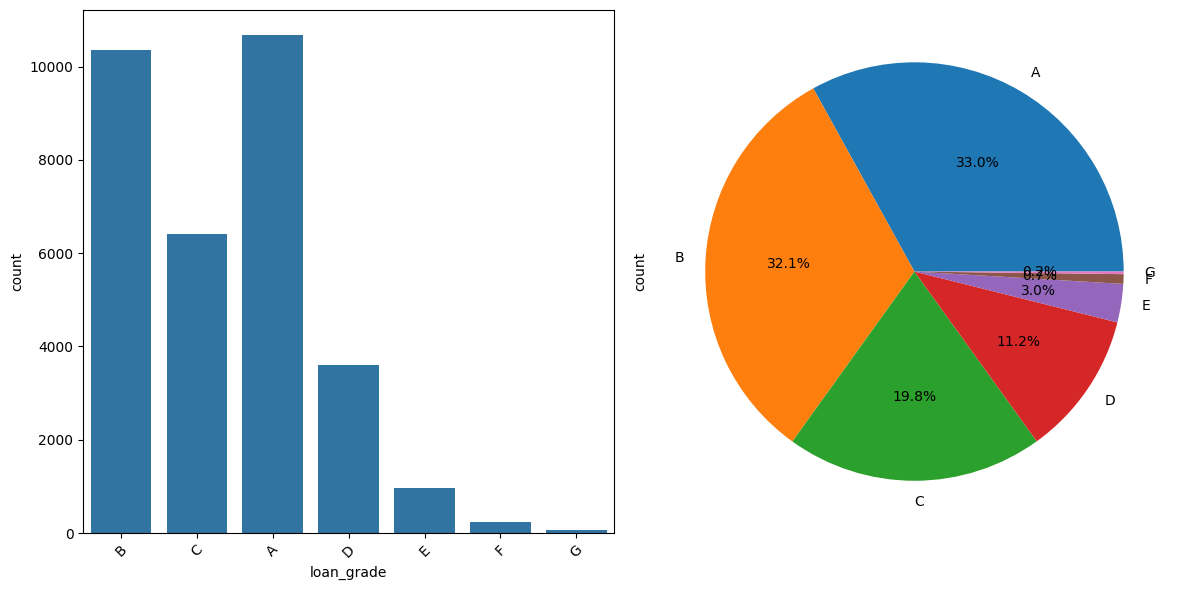

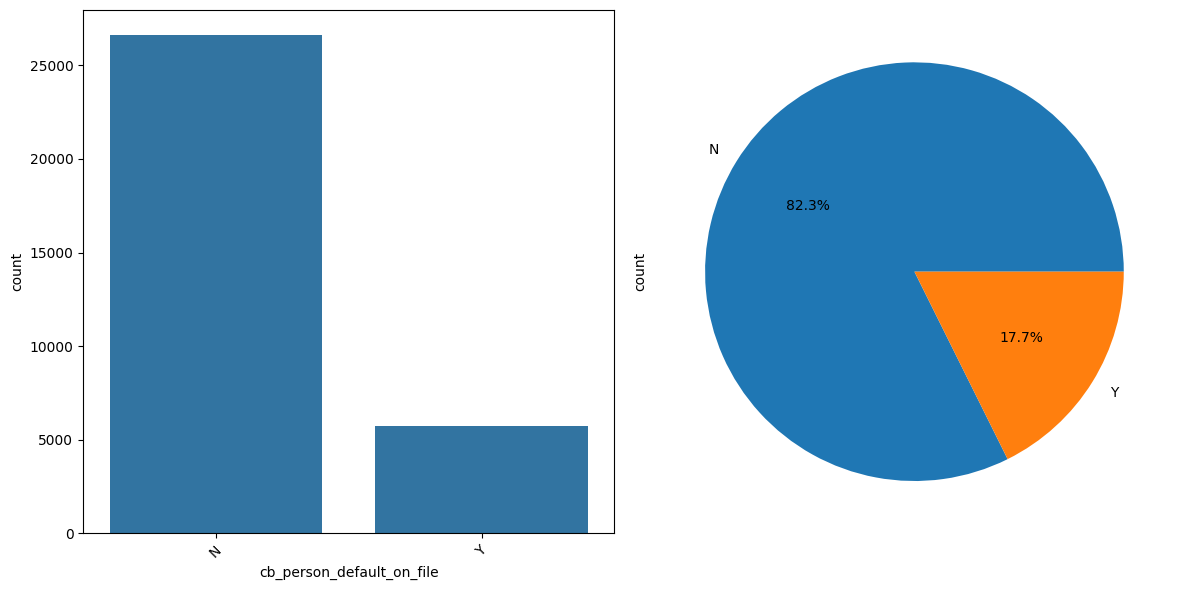

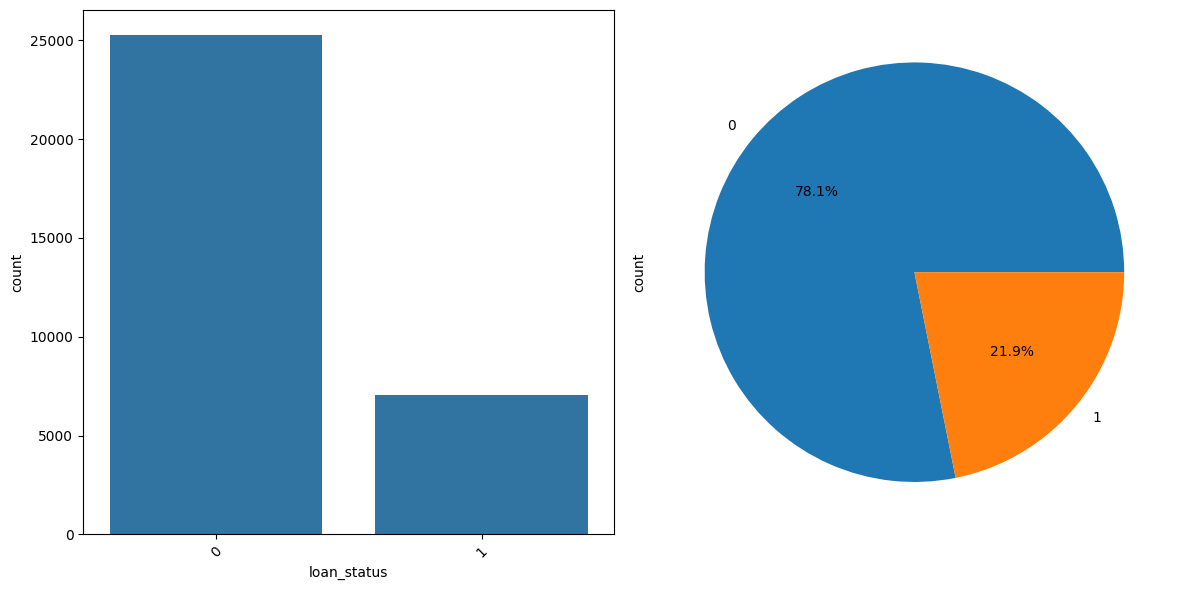

In [23]:
def categorical_analysis(data,col):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.countplot(x=data[col])
    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    data[col].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.tight_layout()
    plt.show()

for i in categorical_cols.columns:
    categorical_analysis(categorical_cols,i)
    

## 4.Bivariate Analysis

### num vs num

In [24]:
print(numerical_cols.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')


<Axes: xlabel='person_age', ylabel='person_income'>

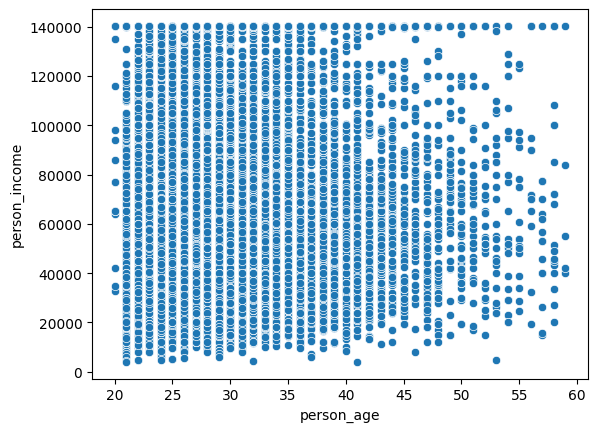

In [25]:
sns.scatterplot(data=numerical_cols,x='person_age',y='person_income')

<Axes: xlabel='person_age', ylabel='loan_amnt'>

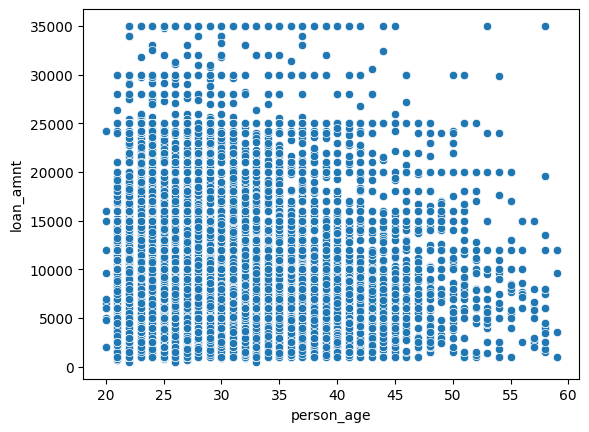

In [26]:
sns.scatterplot(data=numerical_cols,x='person_age',y='loan_amnt')

<Axes: xlabel='loan_amnt', ylabel='person_income'>

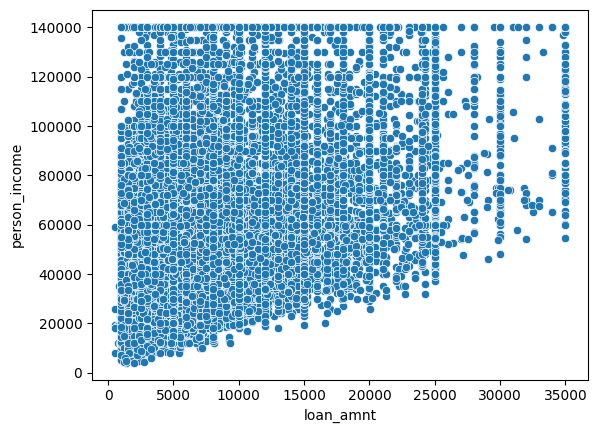

In [27]:
sns.scatterplot(data=numerical_cols,x='loan_amnt',y='person_income')

### cat vs num

In [28]:
categorical_cols.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file', 'loan_status'],
      dtype='object')

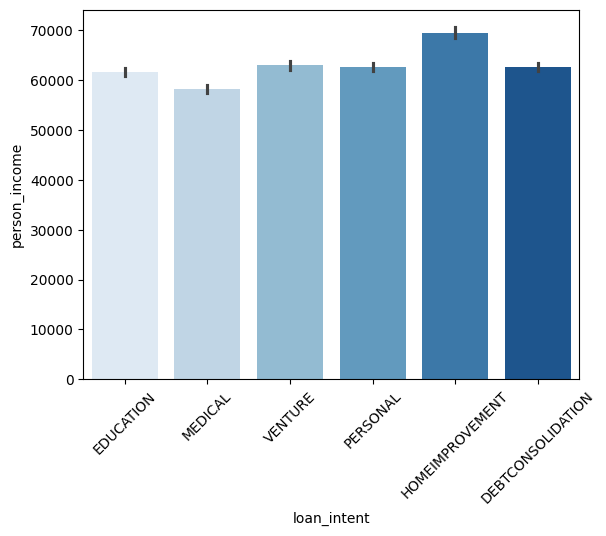

In [29]:
sns.barplot(x=categorical_cols['loan_intent'],y=numerical_cols['person_income'],palette='Blues')
plt.xticks(rotation=45)
plt.show()

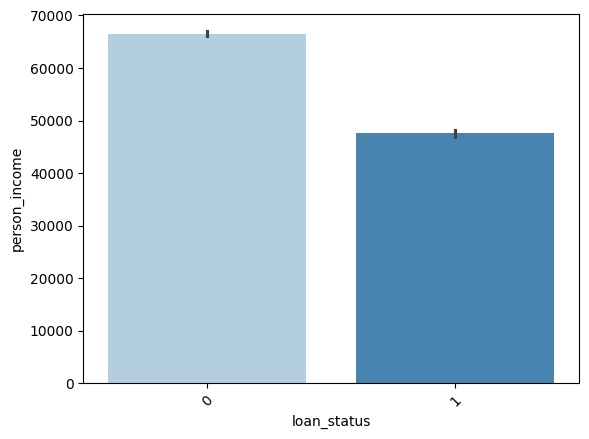

In [30]:
sns.barplot(x=categorical_cols['loan_status'],y=numerical_cols['person_income'],palette='Blues')
plt.xticks(rotation=45)
plt.show()

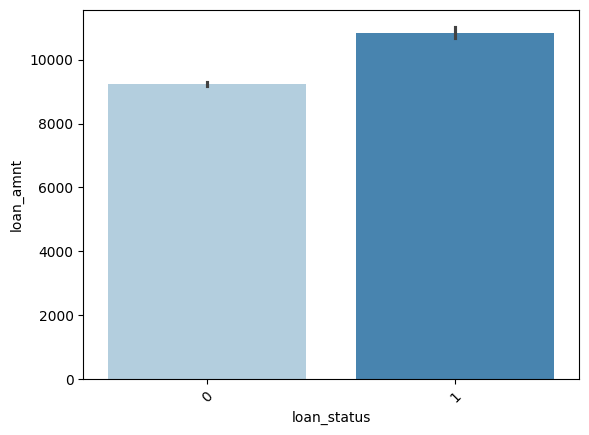

In [31]:
sns.barplot(x=categorical_cols['loan_status'],y=numerical_cols['loan_amnt'],palette='Blues')
plt.xticks(rotation=45)
plt.show()

### cat vs cat

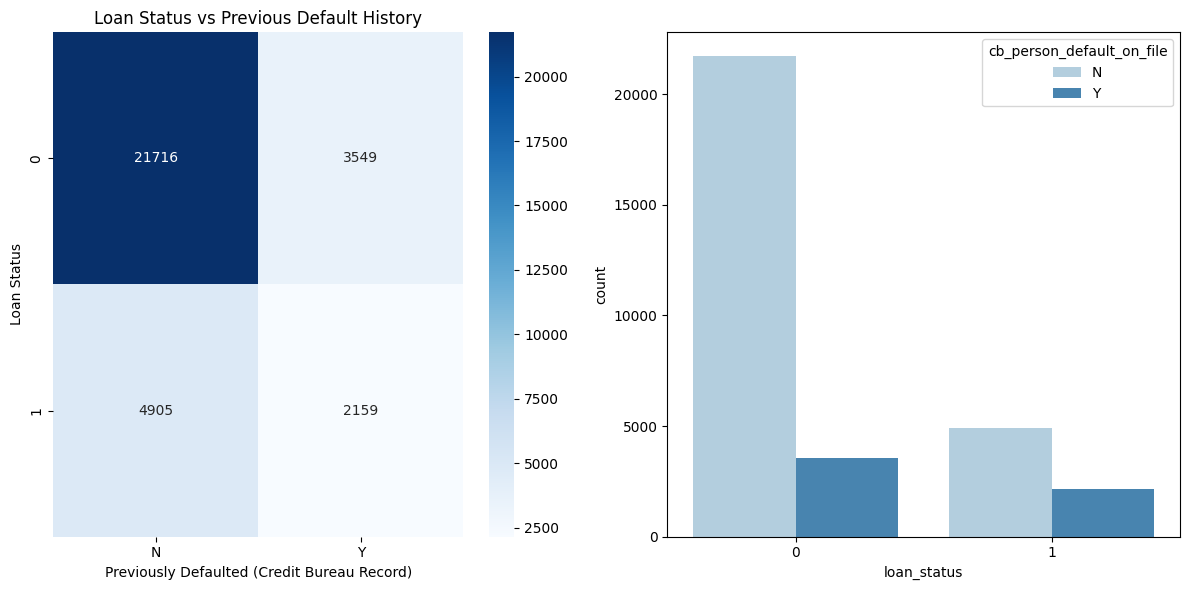

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.heatmap(pd.crosstab(index=categorical_cols['loan_status'],
                        columns=categorical_cols['cb_person_default_on_file']),
            annot=True, fmt='d', cmap='Blues')
plt.title("Loan Status vs Previous Default History")
plt.xlabel("Previously Defaulted (Credit Bureau Record)")
plt.ylabel("Loan Status")

plt.subplot(1,2,2)
sns.countplot(data=categorical_cols,x='loan_status',hue='cb_person_default_on_file',palette='Blues')
plt.tight_layout()
plt.show()


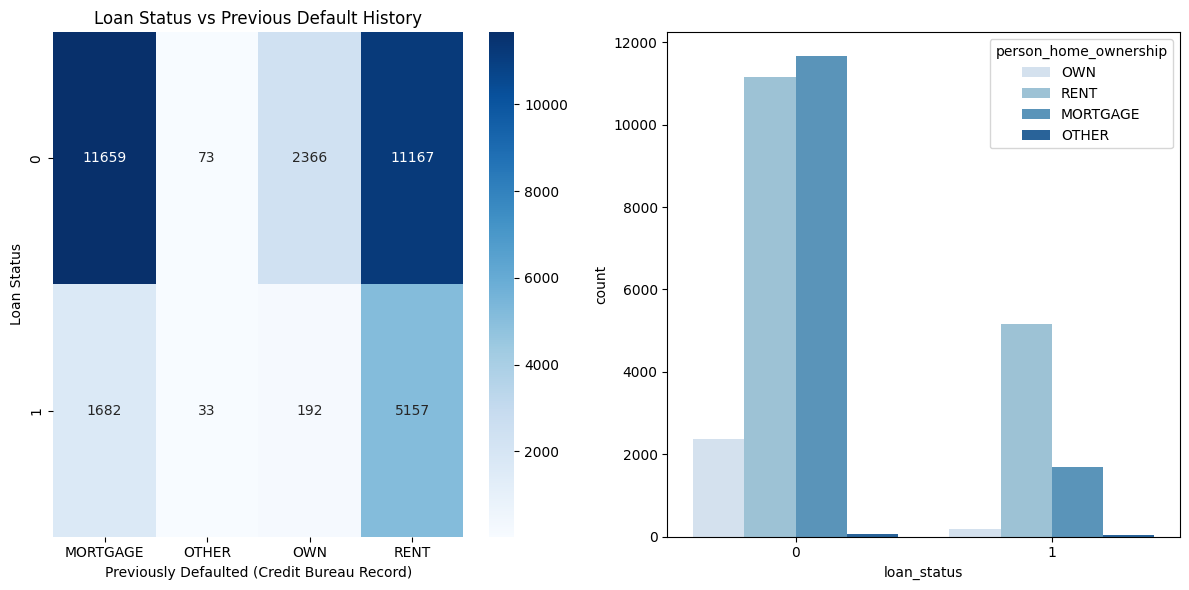

In [33]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.heatmap(pd.crosstab(index=categorical_cols['loan_status'],
                        columns=categorical_cols['person_home_ownership']),
            annot=True, fmt='d', cmap='Blues')
plt.title("Loan Status vs Previous Default History")
plt.xlabel("Previously Defaulted (Credit Bureau Record)")
plt.ylabel("Loan Status")

plt.subplot(1,2,2)
sns.countplot(data=categorical_cols,x='loan_status',hue='person_home_ownership',palette='Blues')
plt.tight_layout()
plt.show()

#### Pairplot

In [34]:
data=pd.concat([numerical_cols,categorical_cols],axis=1)

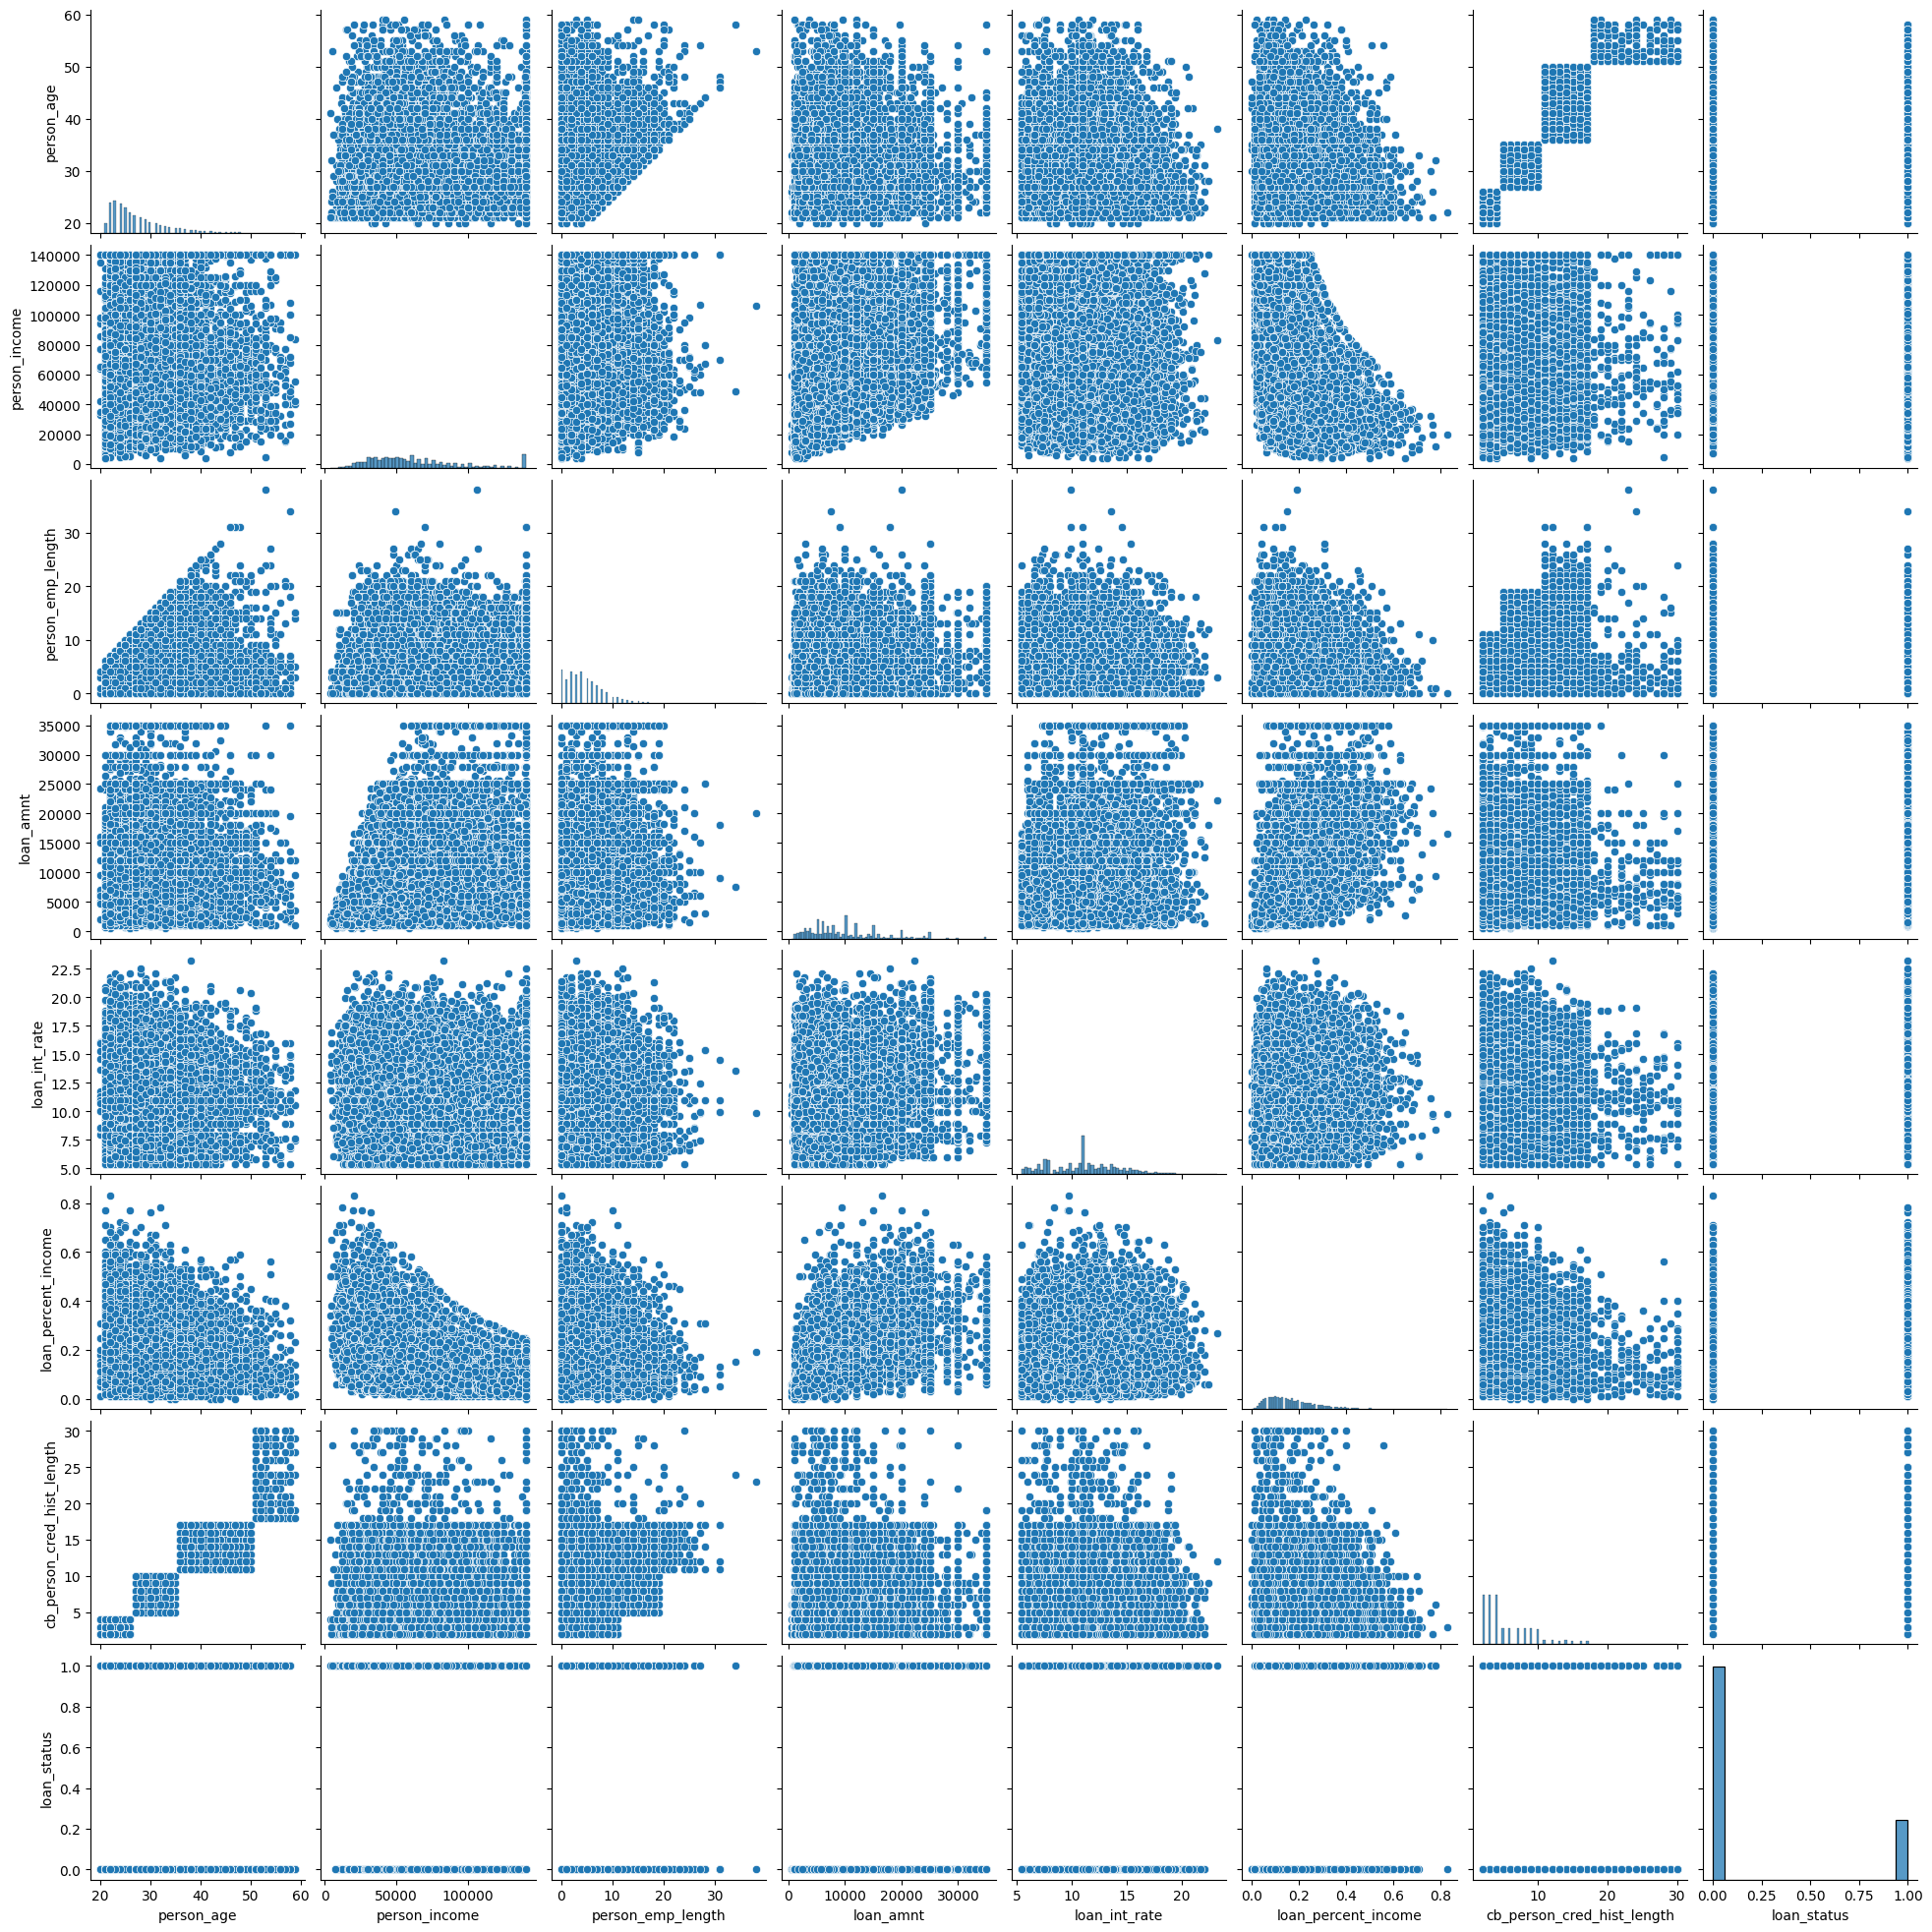

In [35]:
sns.pairplot(data)

## 5.Target variable

#### The task is to find the customer default or not on the Loan payments so its a classificatin problem

In [36]:
X=data.drop('loan_status',axis=1)
Y=data['loan_status']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(24246, 11) (8083, 11)
(24246,) (8083,)


In [37]:
num_cols=X.select_dtypes(include=['int','float']).columns
cat_cols=X.select_dtypes(include='object').columns

In [38]:
scaler=StandardScaler()
x_train_num=scaler.fit_transform(x_train[num_cols])
x_train_num=pd.DataFrame(x_train_num,columns=num_cols)
x_test_num=scaler.transform(x_test[num_cols])
x_test_num=pd.DataFrame(x_test_num,columns=num_cols)

In [39]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
x_train_cat = encoder.fit_transform(x_train[cat_cols])
x_train_cat=pd.DataFrame(x_train_cat,columns=encoder.get_feature_names_out(cat_cols))
x_test_cat = encoder.transform(x_test[cat_cols])
x_test_cat=pd.DataFrame(x_test_cat,columns=encoder.get_feature_names_out(cat_cols))

In [40]:
x_train_preprocessed=pd.concat([x_train_num,x_train_cat],axis=1)
x_test_preprocessed=pd.concat([x_test_num,x_test_cat],axis=1)

In [41]:
print(x_train_preprocessed.shape,x_test_preprocessed.shape)

(24246, 26) (8083, 26)


## 6.Model Building

In [42]:
rf=RandomForestClassifier(random_state=42)
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": rf,
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC()
}

# Store results
results = []

for name, model in models.items():
    model.fit(x_train_preprocessed, y_train)
    y_pred = model.predict(x_test_preprocessed)
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})

# Create a comparison table
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print(results_df)

                 Model  Accuracy
0        Random Forest  0.931337
1                  SVM  0.910429
2        Decision Tree  0.891006
3                  KNN  0.882964
4  Logistic Regression  0.855499


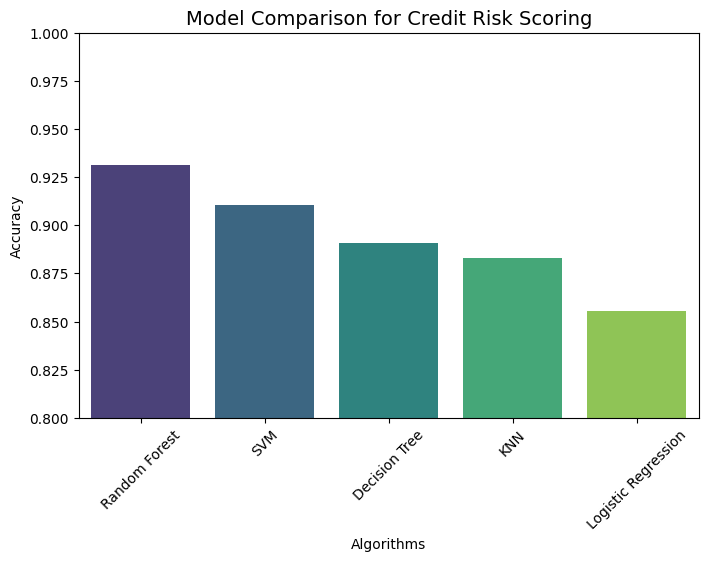

In [43]:

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')

plt.title('Model Comparison for Credit Risk Scoring', fontsize=14)
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.show()


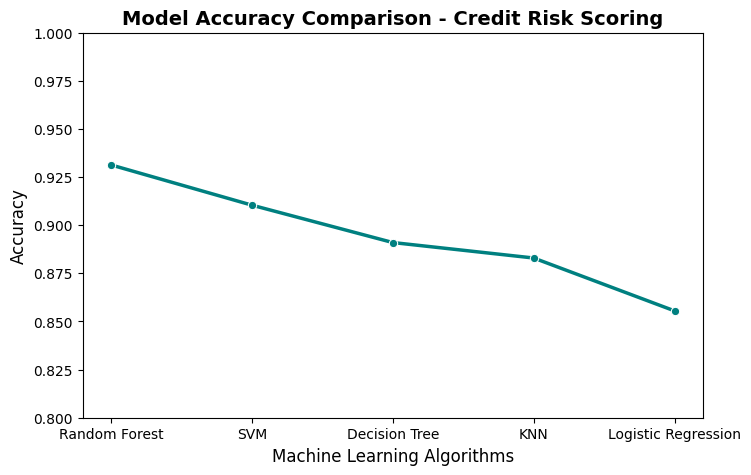

In [45]:

plt.figure(figsize=(8,5))

sns.lineplot(
    x='Model', y='Accuracy', data=results_df,
    marker='o', linewidth=2.5, color='teal'
)

# Customize the plot
plt.title('Model Accuracy Comparison - Credit Risk Scoring', fontsize=14, weight='bold')
plt.xlabel('Machine Learning Algorithms', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.8, 1.0)
plt.show()


### Evaluation of the algorithms based on the parameters
## So based on evaluation the Random Forest Algorithm gives the best result

In [60]:
y_test_pred=rf.predict(x_test_preprocessed)
print("Accuracy score:",accuracy_score(y_test_pred,y_test))
print("Classification Report:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n",classification_report(y_test,y_test_pred))


Accuracy score: 0.9313373747371025
Classification Report:
 [[6265   50]
 [ 505 1263]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      6315
           1       0.96      0.71      0.82      1768

    accuracy                           0.93      8083
   macro avg       0.94      0.85      0.89      8083
weighted avg       0.93      0.93      0.93      8083



In [62]:
y_test_pred=model.predict(x_test_preprocessed)
print("Accuracy score:",accuracy_score(y_test_pred,y_test))
print("Classification Report:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n",classification_report(y_test,y_test_pred))


Accuracy score: 0.9104292960534455
Classification Report:
 [[6227   88]
 [ 636 1132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      6315
           1       0.93      0.64      0.76      1768

    accuracy                           0.91      8083
   macro avg       0.92      0.81      0.85      8083
weighted avg       0.91      0.91      0.90      8083



### Exporting the Model and scaler

In [46]:
import pickle
pickle.dump(rf, open('model/model.pkl', 'wb'))
pickle.dump(scaler, open('model/scaler.pkl', 'wb'))
pickle.dump(encoder, open('model/encoder.pkl', 'wb'))

